In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

df = pd.read_csv("go_emotions_dataset.csv")
df.columns

<ipython-input-1-8c78a6260fcf>:8: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("go_emotions_dataset.csv")


Index(['id', 'text', 'example_very_unclear', 'admiration', 'amusement',
       'anger', 'annoyance', 'approval', 'caring', 'confusion', 'curiosity',
       'desire', 'disappointment', 'disapproval', 'disgust', 'embarrassment',
       'excitement', 'fear', 'gratitude', 'grief', 'joy', 'love',
       'nervousness', 'optimism', 'pride', 'realization', 'relief', 'remorse',
       'sadness', 'surprise', 'neutral'],
      dtype='object')

In [ ]:
df = df[df['example_very_unclear'] == 0]

texts = df['text'].values
emotion_columns = ['admiration', 'amusement', 'anger', 'annoyance', 'approval', 'caring',
                   'confusion', 'curiosity', 'desire', 'disappointment', 'disapproval',
                   'disgust', 'embarrassment', 'excitement', 'fear', 'gratitude',
                   'grief', 'joy', 'love', 'nervousness', 'optimism', 'pride',
                   'realization', 'relief', 'remorse', 'sadness', 'surprise', 'neutral']
labels = df[emotion_columns].values

In [ ]:
# Parameters (tune these based on your dataset)
MAX_WORDS = 10000  # Vocabulary size
MAX_LEN = 100      # Maximum sequence length

# Tokenize the text
tokenizer = Tokenizer(num_words=MAX_WORDS, oov_token='<OOV>')
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
padded_sequences = pad_sequences(sequences, maxlen=MAX_LEN, padding='post', truncating='post')

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(padded_sequences, labels,
                                                  test_size=0.2, random_state=42)

In [ ]:
# Model parameters
NUM_EMOTIONS = len(emotion_columns)  # 28 in your case
EMBEDDING_DIM = 128

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(MAX_WORDS, EMBEDDING_DIM, input_length=MAX_LEN),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(NUM_EMOTIONS, activation='sigmoid')  # Sigmoid for multi-label
])

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)  # ลดจาก default 0.001

# Compile the model
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',  # Suitable for multi-label
              metrics=['accuracy'])

# Model summary
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train, y_train,
                    validation_data=(X_val, y_val),
                    epochs=20,
                    batch_size=32,)

Epoch 1/20
2733/2733 ━━━━━━━━━━━━━━━━━━━━ 355s 128ms/step - accuracy: 0.2352 - loss: 0.1962 - val_accuracy: 0.3271 - val_loss: 0.1427
Epoch 2/20
2733/2733 ━━━━━━━━━━━━━━━━━━━━ 391s 131ms/step - accuracy: 0.3406 - loss: 0.1433 - val_accuracy: 0.3736 - val_loss: 0.1323
Epoch 3/20
2733/2733 ━━━━━━━━━━━━━━━━━━━━ 384s 132ms/step - accuracy: 0.3806 - loss: 0.1323 - val_accuracy: 0.3792 - val_loss: 0.1289
Epoch 4/20
2733/2733 ━━━━━━━━━━━━━━━━━━━━ 361s 132ms/step - accuracy: 0.3968 - loss: 0.1259 - val_accuracy: 0.3888 - val_loss: 0.1274
Epoch 5/20
2733/2733 ━━━━━━━━━━━━━━━━━━━━ 381s 132ms/step - accuracy: 0.4129 - loss: 0.1208 - val_accuracy: 0.3860 - val_loss: 0.1276
Epoch 6/20
2733/2733 ━━━━━━━━━━━━━━━━━━━━ 383s 132ms/step - accuracy: 0.4262 - loss: 0.1172 - val_accuracy: 0.3834 - val_loss: 0.1288
Epoch 7/20
2733/2733 ━━━━━━━━━━━━━━━━━━━━ 381s 132ms/step - accuracy: 0.4391 - loss: 0.1132 - val_accuracy: 0.3831 - val_loss: 0.1307
Epoch 8/20
2733/2733 ━━━━━━━━━━━━━━━━━━━━ 383s 132ms/step - ac

In [ ]:
model.save("emotion_model.keras")
print("Model saved to 'emotion_model' folder.")

Model saved to 'emotion_model' folder.


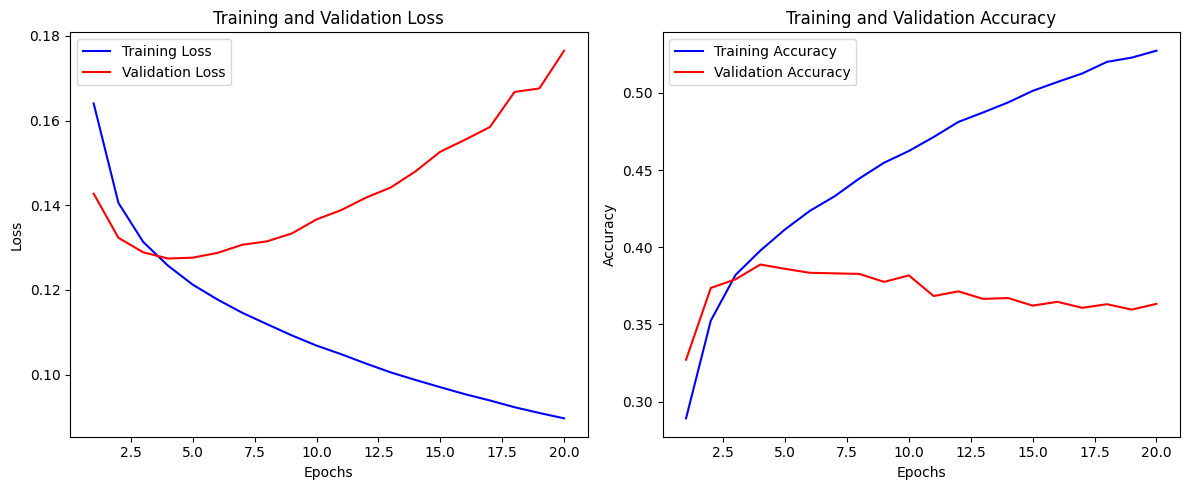

In [ ]:
import matplotlib.pyplot as plt

# Plot training history
def plot_training_history(history):
    # Extract loss and accuracy from history
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    train_acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    epochs = range(1, len(train_loss) + 1)

    # Create subplots for loss and accuracy
    plt.figure(figsize=(12, 5))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_loss, 'b-', label='Training Loss')
    plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_acc, 'b-', label='Training Accuracy')
    plt.plot(epochs, val_acc, 'r-', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Display the plot
    plt.tight_layout()
    plt.show()

# Call the plotting function
plot_training_history(history)

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(X_val, y_val)
print(f"Validation Loss: {loss}, Validation Accuracy: {accuracy}")

# Example prediction
sample_text = ["I’m so happy and grateful today!"]
sample_seq = tokenizer.texts_to_sequences(sample_text)
sample_padded = pad_sequences(sample_seq, maxlen=MAX_LEN, padding='post', truncating='post')
predictions = model.predict(sample_padded)

# Apply threshold (e.g., 0.5)
threshold = 0.5
predicted_emotions = [emotion_columns[i] for i in range(NUM_EMOTIONS) if predictions[0][i] > threshold]
print(f"Predicted emotions: {predicted_emotions}")

684/684 ━━━━━━━━━━━━━━━━━━━━ 21s 31ms/step - accuracy: 0.3674 - loss: 0.1762
Validation Loss: 0.17648138105869293, Validation Accuracy: 0.3633078634738922
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 595ms/step
Predicted emotions: ['joy']
